# Avocado Prices and Sales Volume 2015-2023

In [1]:
from IPython.display import Image
Image(url='https://www.buygrow.co.za/cdn/shop/products/FuerteAvocadoWB.png?v=1675280423')


# Table of Contents
- [1. Project Overview](#1-project-overview)
  - [1.1 Introduction](#11-introduction)
  - [1.2 Problem Statement](#12-problem-statement)
  - [1.3 Objectives](#13-objectives)
- [2. Importing Packages](#2-importing-packages)
- [3. Loading Data](#3-loading-data)
- [4. Data Cleaning](#4-data-cleaning)
- [5. Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
- [6. Conclusion](#6-conclusion)

### 1. Project Overview

##### 1.1 Introduction

This project focuses on data cleaning and exploratory data analysis (EDA) of historical avocado prices. The primary goal is to clean the dataset and explore trends, seasonal patterns, and potential factors affecting avocado prices, setting a foundation for future predictive modeling.

##### 1.2 Problem Statement

##### 1.3 Objectives

- Data Cleaning: Ensure data quality by handling missing values, correcting data types and adding new columns.
- Exploratory Data Analysis (EDA): Identify trends, seasonal variations, and key differences in avocado prices by region and type (conventional vs. organic).


### 2. Importing Packages

In [2]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

### 3. Loading Data

The data used for this project was located in the Avocado_HassAvocadoBoard_20152023v1.0.1.csv file. To better manipulate and analyse the Avocado_HassAvocadoBoard_20152023v1.0.1.csv file, it was loaded into a Pandas Data Frame using the Pandas function, .read_csv(). 

In [3]:
# loading dataset
df = pd.read_csv("Avocado_HassAvocadoBoard_20152023v1.0.1.csv", index_col=False)

Check the DataFrame to see if it loaded correctly.

In [4]:
df.head() 

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


In [5]:
# Displays the number of rows and columns
df.shape

(53415, 12)

Results : The dataset consists of 53415 rows (observations) and 12 columns (features).

In [6]:
## Display summary information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


In [7]:
df.describe()

,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags
count,53415.000000,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,4.102500e+04,4.102500e+04,41025.000000
mean,1.428910,8.694474e+05,2.982707e+05,2.222170e+05,2.053195e+04,2.175083e+05,1.039222e+05,2.331316e+04,2731.811796
std,0.393116,3.545274e+06,1.307669e+06,9.554624e+05,1.040977e+05,8.676947e+05,5.692608e+05,1.496622e+05,22589.096454
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.119091,1.626465e+04,6.947250e+02,2.120800e+03,0.000000e+00,7.846520e+03,0.000000e+00,0.000000e+00,0.000000
50%,1.400000,1.203525e+05,1.458058e+04,1.751663e+04,9.005000e+01,3.695310e+04,6.945800e+02,0.000000e+00,0.000000
75%,1.690000,4.542380e+05,1.287924e+05,9.351560e+04,3.599735e+03,1.110146e+05,3.795298e+04,2.814920e+03,0.000000
max,3.440830,6.103446e+07,2.544720e+07,2.047057e+07,2.860025e+06,1.629830e+07,1.256716e+07,4.324231e+06,679586.800000


### 4. Data Cleaning

In [8]:
# Creating a copy of the dataframe where the cleaning will be made
df_copy = df
df_copy

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.790000,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.760000,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.080000,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington
...,...,...,...,...,...,...,...,...,...,...,...,...
53410,2023-12-03,1.550513,5693.91,204.64,1211.25,0.00,4278.03,NaN,NaN,NaN,organic,Toledo
53411,2023-12-03,1.703920,343326.10,66808.44,132075.11,58.65,138830.45,NaN,NaN,NaN,organic,West
53412,2023-12-03,1.618931,34834.86,15182.42,1211.38,0.00,18075.66,NaN,NaN,NaN,organic,WestTexNewMexico
53413,2023-12-03,1.245406,2942.83,1058.54,7.46,0.00,1779.19,NaN,NaN,NaN,organic,Wichita


In [9]:
# The region column is actually locations mixed with regions and total US data

unique_region_values = df_copy.region.drop_duplicates()
unique_region_values

0                      Albany
2                     Atlanta
4         BaltimoreWashington
6                       Boise
8                      Boston
10           BuffaloRochester
12                 California
14                  Charlotte
16                    Chicago
18           CincinnatiDayton
20                   Columbus
22              DallasFtWorth
24                     Denver
26                    Detroit
28                GrandRapids
30                 GreatLakes
32         HarrisburgScranton
34        HartfordSpringfield
36                    Houston
38               Indianapolis
40               Jacksonville
42                   LasVegas
44                 LosAngeles
46                 Louisville
48                      Miami
50                   Midsouth
52                  Nashville
54                 NewOrleans
56                    NewYork
58                  Northeast
60         NorthernNewEngland
62                    Orlando
64               Philadelphia
66        

In [10]:
# Seperating regions from the dataset
region_names = ['California', 'West', 'Plains', 'SouthCentral',
                'Southeast', 'Midsouth', 'GreatLakes', 'Northeast']

regions_df = df_copy.query('region in @region_names')

regions_df

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
12,2015-01-04,0.930000,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,California
13,2015-01-04,1.240000,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.00,organic,California
30,2015-01-04,1.020000,3382800.12,467259.47,2059657.71,318102.38,537780.56,412779.64,111072.91,13928.01,conventional,GreatLakes
31,2015-01-04,1.540000,61615.10,3633.93,42963.06,0.00,15018.11,9763.55,5254.56,0.00,organic,GreatLakes
50,2015-01-04,1.100000,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,314.80,conventional,Midsouth
...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2023-12-03,1.404208,314344.43,16056.66,21969.60,0.00,225286.83,NaN,NaN,NaN,organic,Northeast
53393,2023-12-03,1.309767,59865.39,9819.27,2863.94,0.00,38970.92,NaN,NaN,NaN,organic,Plains
53404,2023-12-03,1.261000,172951.53,43352.71,3886.13,0.00,121038.09,NaN,NaN,NaN,organic,SouthCentral
53405,2023-12-03,1.263368,348740.78,2465.90,17244.86,0.00,329026.87,NaN,NaN,NaN,organic,Southeast


In [11]:
# Seperating the locations from the dataset
locations_df = df_copy.query('region not in @region_names')
locations_df = locations_df.rename(columns={'region': 'Location'})

# Seperating the 'TotalUS' from the locations_df
us_total = 'TotalUS'
total_us_df = locations_df.query('Location == @us_total')

In [12]:
# Now we have 3 dataframes
# 1. regions_df for regions only
# 2. locations_df for locations only
# 3. total_us_df for all of US

In [13]:
# Next is cleaning the data
# Checking for data with null values regions_df
regions_df.isnull().any()

Date            False
AveragePrice    False
TotalVolume     False
plu4046         False
plu4225         False
plu4770         False
TotalBags       False
SmallBags        True
LargeBags        True
XLargeBags       True
type            False
region          False
dtype: bool

In [14]:
# Checking for data with null values for locations_df
locations_df.isnull().any()

Date            False
AveragePrice    False
TotalVolume     False
plu4046         False
plu4225         False
plu4770         False
TotalBags       False
SmallBags        True
LargeBags        True
XLargeBags       True
type            False
Location        False
dtype: bool

In [15]:
# Checking for data with null values for total_us_df
total_us_df.isnull().any()

Date            False
AveragePrice    False
TotalVolume     False
plu4046         False
plu4225         False
plu4770         False
TotalBags       False
SmallBags        True
LargeBags        True
XLargeBags       True
type            False
Location        False
dtype: bool

In [16]:
# We replace the null values with their column means
# This is for the regions_df
regions_df['SmallBags'] = regions_df['SmallBags'].astype(str)
regions_df['SmallBags'].replace('NaN', None)
regions_df['SmallBags'] = regions_df['SmallBags'].astype(float)
regions_df['SmallBags'].fillna(regions_df['SmallBags'].mean(), inplace=True)

regions_df['LargeBags'] = regions_df['LargeBags'].astype(str)
regions_df['LargeBags'].replace('NaN', None)
regions_df['LargeBags'] = regions_df['LargeBags'].astype(float)
regions_df['LargeBags'].fillna(regions_df['LargeBags'].mean(), inplace=True)

regions_df['XLargeBags'] = regions_df['XLargeBags'].astype(str)
regions_df['XLargeBags'].replace('NaN', None)
regions_df['XLargeBags'] = regions_df['XLargeBags'].astype(float)
regions_df['XLargeBags'].fillna(regions_df['XLargeBags'].mean(), inplace=True)

regions_df.isnull().any()

Date            False
AveragePrice    False
TotalVolume     False
plu4046         False
plu4225         False
plu4770         False
TotalBags       False
SmallBags       False
LargeBags       False
XLargeBags      False
type            False
region          False
dtype: bool

In [17]:
# This is for the locations_df
locations_df['SmallBags'] = locations_df['SmallBags'].astype(str)
locations_df['SmallBags'].replace('NaN', None)
locations_df['SmallBags'] = locations_df['SmallBags'].astype(float)
locations_df['SmallBags'].fillna(locations_df['SmallBags'].mean(), inplace=True)

locations_df['LargeBags'] = locations_df['LargeBags'].astype(str)
locations_df['LargeBags'].replace('NaN', None)
locations_df['LargeBags'] = locations_df['LargeBags'].astype(float)
locations_df['LargeBags'].fillna(locations_df['LargeBags'].mean(), inplace=True)

locations_df['XLargeBags'] = locations_df['XLargeBags'].astype(str)
locations_df['XLargeBags'].replace('NaN', None)
locations_df['XLargeBags'] = locations_df['XLargeBags'].astype(float)
locations_df['XLargeBags'].fillna(locations_df['XLargeBags'].mean(), inplace=True)

locations_df.isnull().any()

Date            False
AveragePrice    False
TotalVolume     False
plu4046         False
plu4225         False
plu4770         False
TotalBags       False
SmallBags       False
LargeBags       False
XLargeBags      False
type            False
Location        False
dtype: bool

In [18]:
# This is for the total_us_df
total_us_df['SmallBags'] = total_us_df['SmallBags'].astype(str)
total_us_df['SmallBags'].replace('NaN', None)
total_us_df['SmallBags'] = total_us_df['SmallBags'].astype(float)
total_us_df['SmallBags'].fillna(total_us_df['SmallBags'].mean(), inplace=True)

total_us_df['LargeBags'] = total_us_df['LargeBags'].astype(str)
total_us_df['LargeBags'].replace('NaN', None)
total_us_df['LargeBags'] = total_us_df['LargeBags'].astype(float)
total_us_df['LargeBags'].fillna(total_us_df['LargeBags'].mean(), inplace=True)

total_us_df['XLargeBags'] = total_us_df['XLargeBags'].astype(str)
total_us_df['XLargeBags'].replace('NaN', None)
total_us_df['XLargeBags'] = total_us_df['XLargeBags'].astype(float)
total_us_df['XLargeBags'].fillna(total_us_df['XLargeBags'].mean(), inplace=True)

total_us_df.isnull().any()

Date            False
AveragePrice    False
TotalVolume     False
plu4046         False
plu4225         False
plu4770         False
TotalBags       False
SmallBags       False
LargeBags       False
XLargeBags      False
type            False
Location        False
dtype: bool

In [33]:
# We add a 'Year' column which holds the year value from the 'Date' column
# Starting with the regions_df
regions_df['Year'] = regions_df['Date'].str.slice(0, 4).astype(int)
regions_df['Month'] = regions_df['Date'].str.slice(5, 7).astype(int)

# For locations_df
locations_df['Year'] = locations_df['Date'].str.slice(0, 4).astype(int)
locations_df['Month'] = locations_df['Date'].str.slice(5, 7).astype(int)

# For total_us_df
total_us_df['Year'] = total_us_df['Date'].str.slice(0, 4).astype(int)
total_us_df['Month'] = total_us_df['Date'].str.slice(5, 7).astype(int)

# These are the 3 dataframes we have
regions_df.info()
locations_df.info()
total_us_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7456 entries, 12 to 53411
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          7456 non-null   object 
 1   AveragePrice  7456 non-null   float64
 2   TotalVolume   7456 non-null   float64
 3   plu4046       7456 non-null   float64
 4   plu4225       7456 non-null   float64
 5   plu4770       7456 non-null   float64
 6   TotalBags     7456 non-null   float64
 7   SmallBags     7456 non-null   float64
 8   LargeBags     7456 non-null   float64
 9   XLargeBags    7456 non-null   float64
 10  type          7456 non-null   object 
 11  region        7456 non-null   object 
 12  Year          7456 non-null   int32  
 13  Month         7456 non-null   int32  
dtypes: float64(9), int32(2), object(3)
memory usage: 815.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 45959 entries, 0 to 53414
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype

### 5. Exploratory Data Analysis (EDA)

<h3> 5.1 Univariate Analysis</h3>

<h4>Price Analysis</h4>

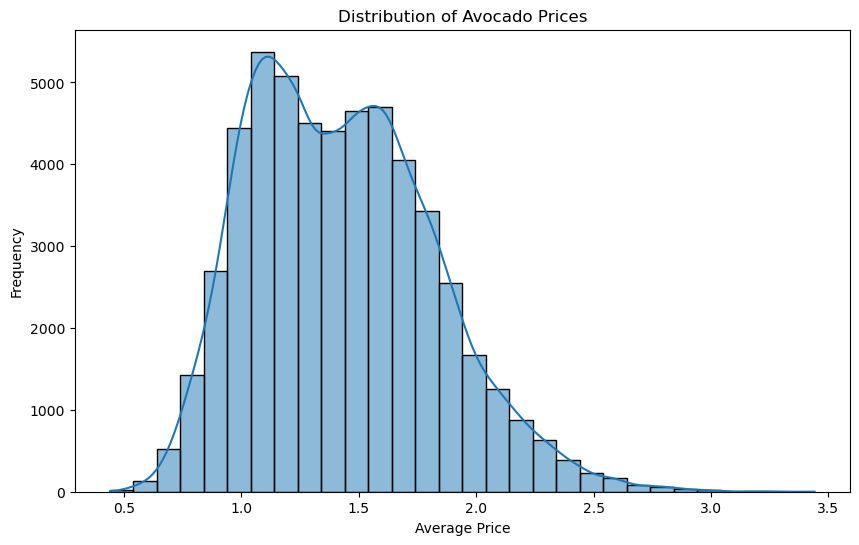

In [14]:
# Histogram for Total Volume
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AveragePrice', bins=30, kde=True)
plt.title('Distribution of Avocado Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

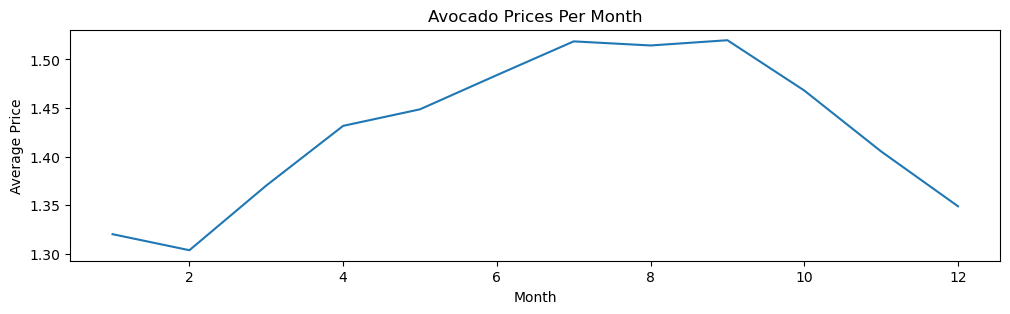

In [15]:
# Line plot of average price over time
plt.figure(figsize=(12, 3))
sns.lineplot(data=df, x='Month', y='AveragePrice', ci = None)
plt.title('Avocado Prices Per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

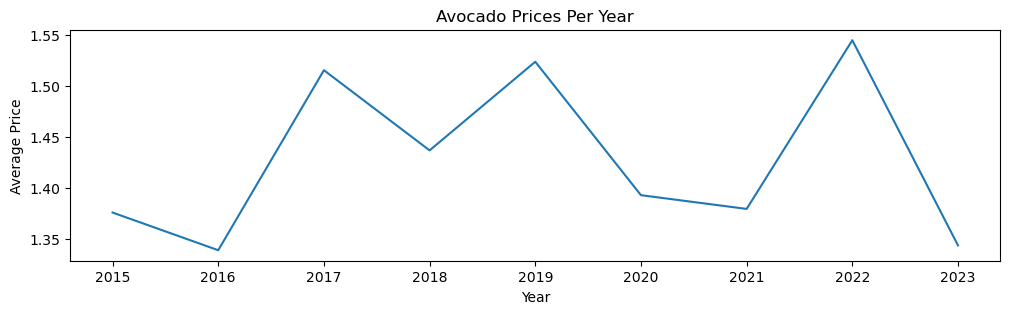

In [16]:
plt.figure(figsize=(12, 3))
sns.lineplot(data=df, x='Year', y='AveragePrice', ci = None)
plt.title('Avocado Prices Per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

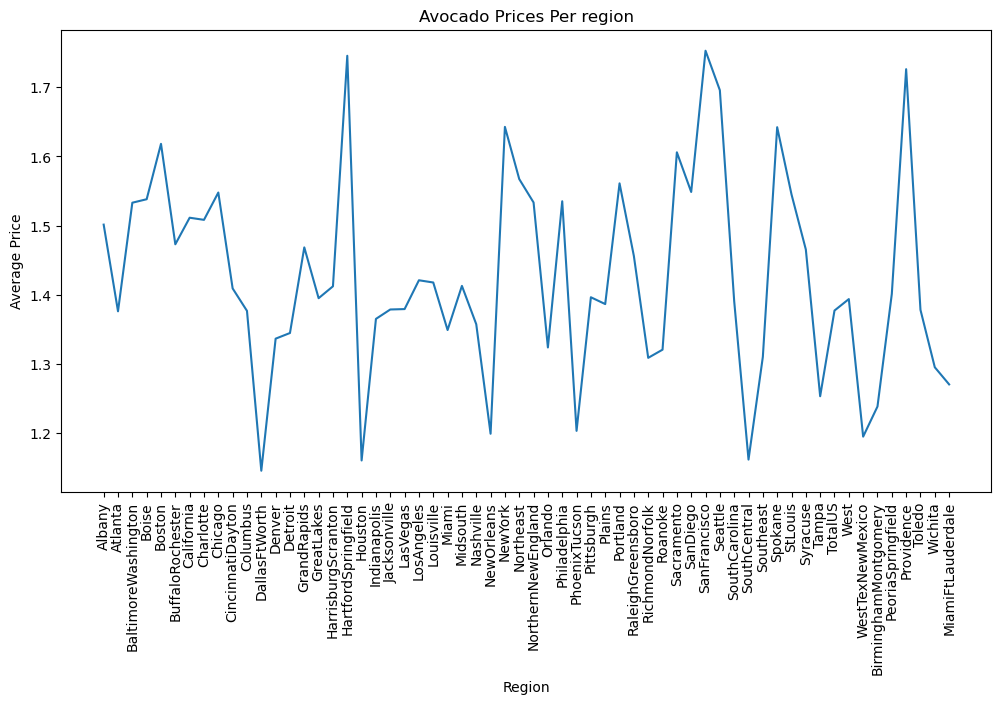

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='region', y='AveragePrice', ci = None)
plt.title('Avocado Prices Per region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate region names for readability
plt.show()

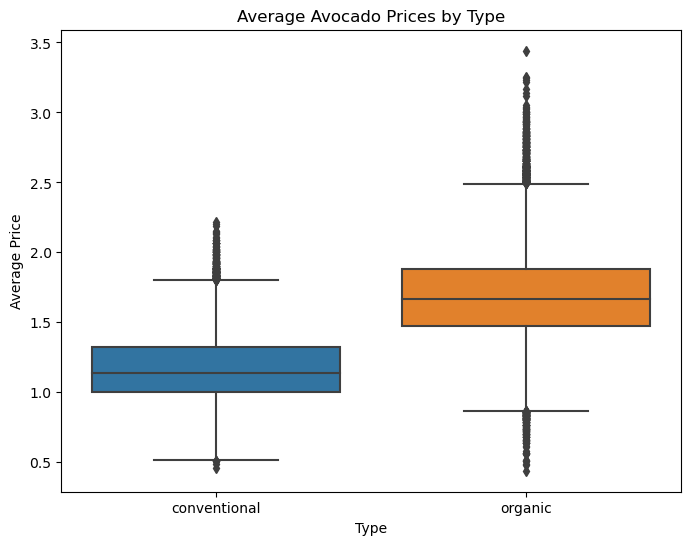

In [18]:
# Box plot of Average Price by Type (Conventional vs Organic)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='type', y='AveragePrice')
plt.title('Average Avocado Prices by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

<h4>Volume Analysis</h4>

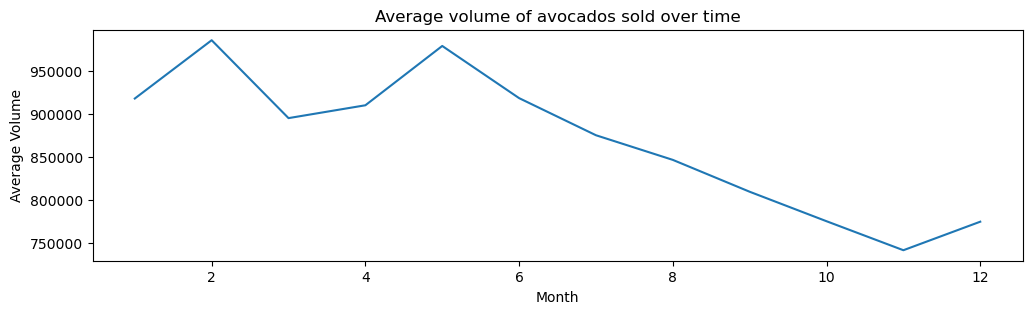

In [19]:
#line plot of average volume over time
plt.figure(figsize=(12, 3))
sns.lineplot(data=df, x='Month', y='TotalVolume', ci = None)
plt.title('Average volume of avocados sold over time')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.show()

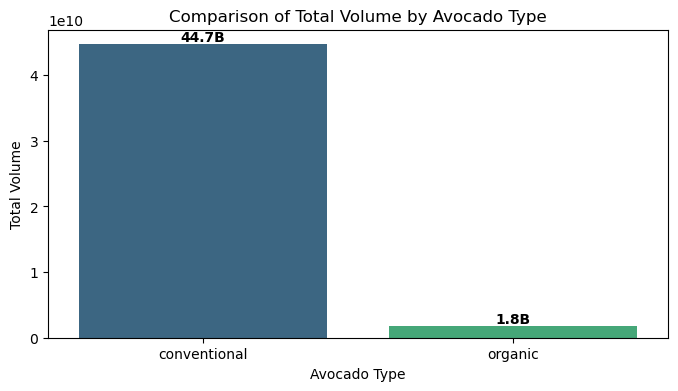

In [20]:
# Calculation of the total volume for each avocado type
volume_by_type = df.groupby('type')['TotalVolume'].sum().reset_index()

# Creating the bar plot
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(data=volume_by_type, x='type', y='TotalVolume', palette='viridis')

# Adding data labels on each bar, rounding to the nearest billion
for index, row in volume_by_type.iterrows():
    billion_volume = row['TotalVolume'] / 1e9  # Convert to billions
    plt.text(index, row['TotalVolume'], f'{billion_volume:.1f}B', 
             ha='center', va='bottom', color='black', fontweight='bold')

# Adding titles and labels
plt.title('Comparison of Total Volume by Avocado Type')
plt.xlabel('Avocado Type')
plt.ylabel('Total Volume')
plt.show()

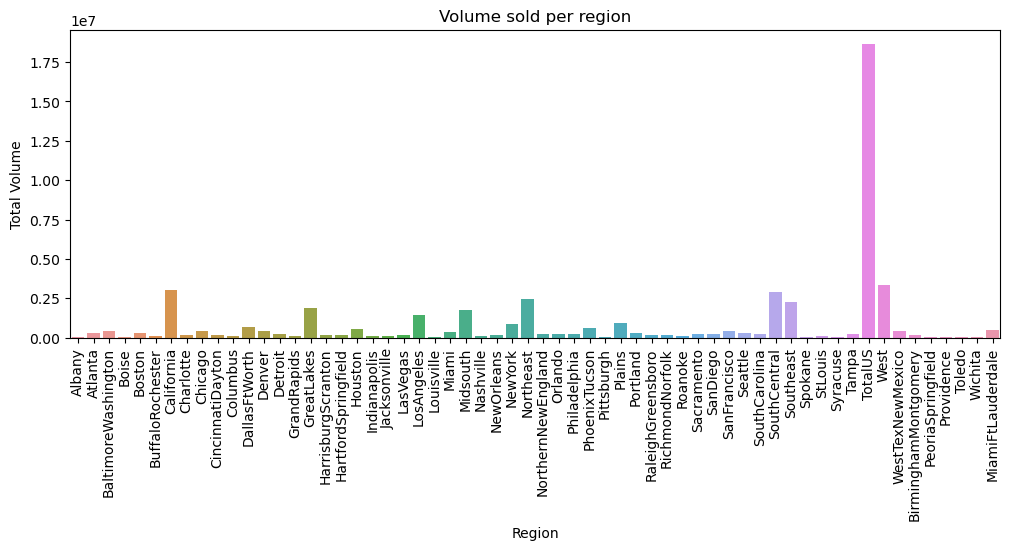

In [24]:
#bar plot of total volume sold per major region
plt.figure(figsize=(12, 4))
sns.barplot(data=df, x='region', y='TotalVolume', ci = None)
plt.title('Volume sold per region')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.xticks(rotation=90)  # Rotate region names for readability
plt.show()

Showing bag size sales trends  for each region, revealing patterns or seasonality in specific regions.

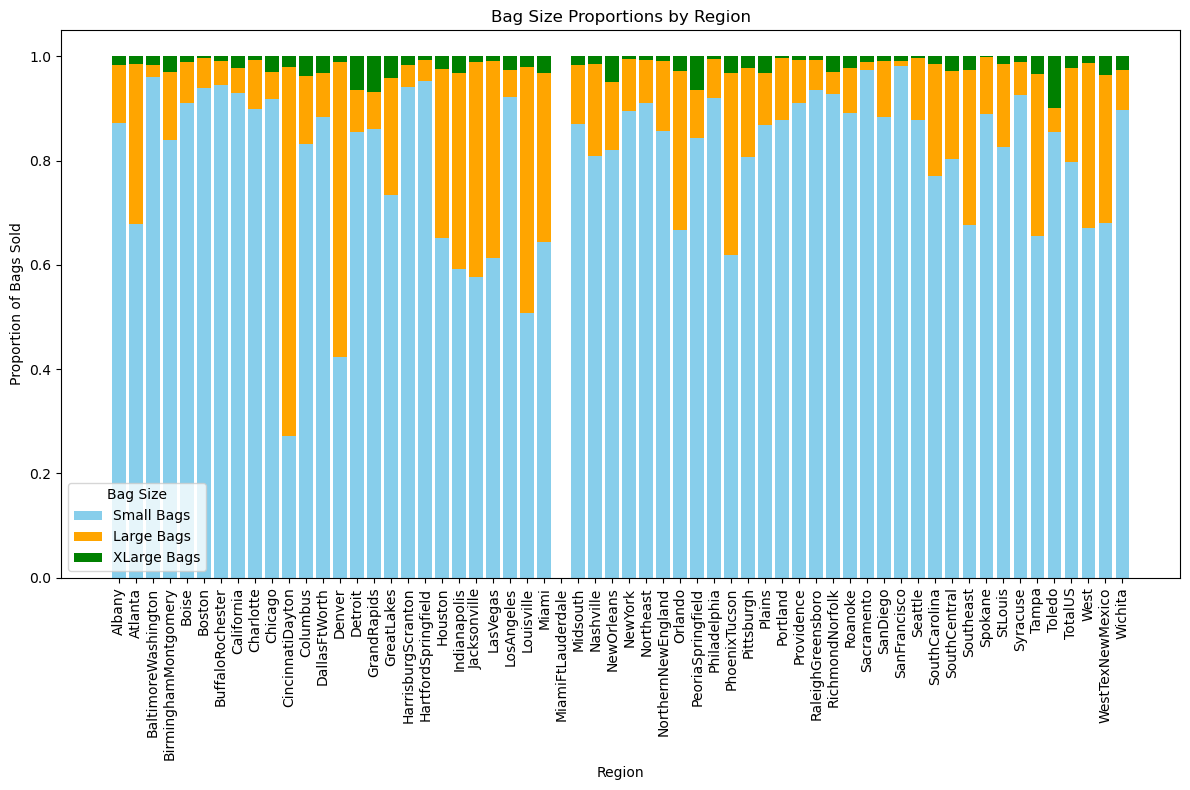

In [20]:
# Group by region and calculate the sum for each bag size
region_bag_sizes = df.groupby('region')[['SmallBags', 'LargeBags', 'XLargeBags']].sum()

# Calculate total bags in each region
region_bag_sizes['TotalBags'] = region_bag_sizes.sum(axis=1)

# Calculate proportions for each bag size in each region
region_bag_sizes['SmallBags_pct'] = region_bag_sizes['SmallBags'] / region_bag_sizes['TotalBags']
region_bag_sizes['LargeBags_pct'] = region_bag_sizes['LargeBags'] / region_bag_sizes['TotalBags']
region_bag_sizes['XLargeBags_pct'] = region_bag_sizes['XLargeBags'] / region_bag_sizes['TotalBags']

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
regions = region_bag_sizes.index
small_bags = region_bag_sizes['SmallBags_pct']
large_bags = region_bag_sizes['LargeBags_pct']
xlarge_bags = region_bag_sizes['XLargeBags_pct']

# Creating stacked bars
plt.bar(regions, small_bags, label='Small Bags', color='skyblue')
plt.bar(regions, large_bags, bottom=small_bags, label='Large Bags', color='orange')
plt.bar(regions, xlarge_bags, bottom=small_bags + large_bags, label='XLarge Bags', color='green')

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Proportion of Bags Sold')
plt.title('Bag Size Proportions by Region')
plt.xticks(rotation=90)  # Rotate region names for readability
plt.legend(title='Bag Size')

# Show plot
plt.tight_layout()
plt.show()

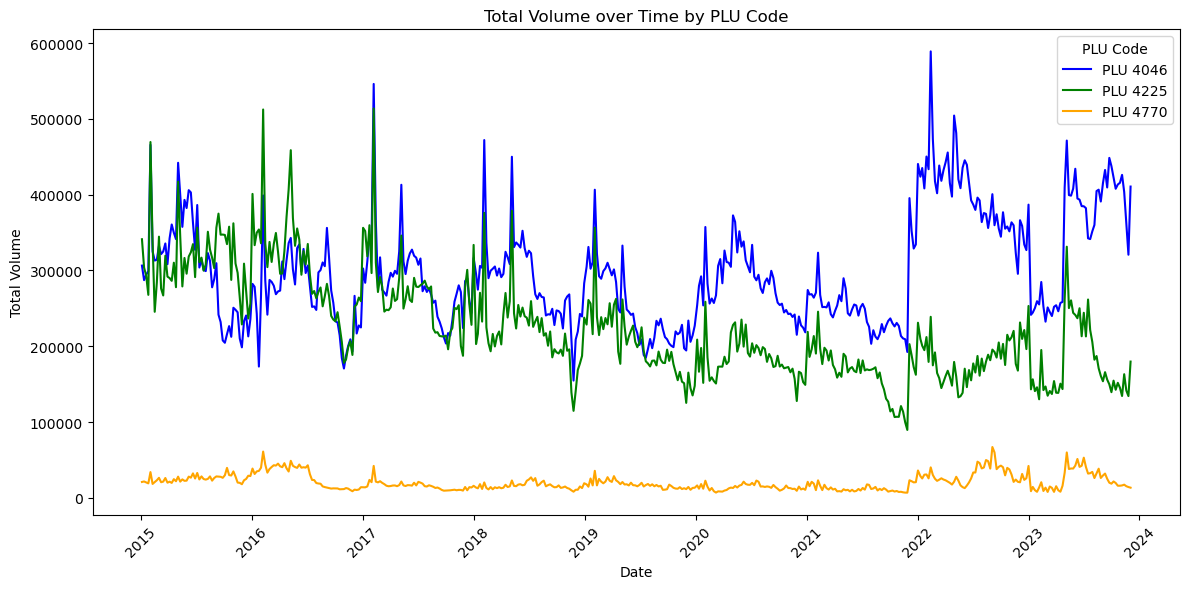

In [23]:
# Ensure that the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a plot to show volume over time by PLU code, without the confidence interval
plt.figure(figsize=(12, 6))

# Plot TotalVolume for each PLU code over time (no confidence interval)
sns.lineplot(
    data=df,
    x='Date',
    y='plu4046',
    label='PLU 4046',  # Add label for PLU 4046
    color='blue',
    ci=None  # Disable the confidence interval
)
sns.lineplot(
    data=df,
    x='Date',
    y='plu4225',
    label='PLU 4225',  # Add label for PLU 4225
    color='green',
    ci=None  # Disable the confidence interval
)
sns.lineplot(
    data=df,
    x='Date',
    y='plu4770',
    label='PLU 4770',  # Add label for PLU 4770
    color='orange',
    ci=None  # Disable the confidence interval
)

# Set plot labels and title
plt.title("Total Volume over Time by PLU Code")
plt.xlabel("Date")
plt.ylabel("Total Volume")
plt.legend(title="PLU Code")

# Display the plot
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()


### 6. Conclusion